## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/BitcoinHeistData.csv")
df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [3]:
pd.options.display.float_format = '{:,.2f}'.format  
df.describe(include=[np.number])

,year,day,length,weight,count,looped,neighbors,income
count,"2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00"
mean,"2,014.48",181.46,45.01,0.55,721.64,238.51,2.21,"4,464,889,007.19"
std,2.26,104.01,58.98,3.67,"1,689.68",966.32,17.92,"162,685,960,669.35"
min,"2,011.00",1.00,0.00,0.00,1.00,0.00,1.00,"30,000,000.00"
25%,"2,013.00",92.00,2.00,0.02,1.00,0.00,1.00,"74,285,590.00"
50%,"2,014.00",181.00,8.00,0.25,1.00,0.00,2.00,"199,998,518.00"
75%,"2,016.00",271.00,108.00,0.88,56.00,0.00,2.00,"994,000,000.00"
max,"2,018.00",365.00,144.00,"1,943.75","14,497.00","14,496.00","12,920.00","49,964,398,238,996.00"


In [4]:
df['label'].unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [5]:
# note: #1: class imbalance present
ransomware_counts = df['label'].value_counts()
print(ransomware_counts)

label
white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw        

In [6]:
print(len(df[df['label']=='white']))
print(len(df[df['label']!='white']))

2875284
41413


In [7]:
def data_preprocessing(data: pd.DataFrame) -> pd.DataFrame:
    # note: #1: drop 'address' column as it is not useful for modeling
    data = data.drop(columns=["address"])

    # note: #2: create binary target variable 'is_ransomware'
    data['is_ransomware'] = (data['label'] != 'white').astype(int)
    data = data.drop(columns=["label"])
    return data

df = data_preprocessing(df)
df.head()

,year,day,length,weight,count,looped,neighbors,income,is_ransomware
0,2017,11,18,0.01,1,0,2,"100,050,000.00",1
1,2016,132,44,0.00,1,0,1,"100,000,000.00",1
2,2016,246,0,1.00,1,0,2,"200,000,000.00",1
3,2016,322,72,0.00,1,0,2,"71,200,000.00",1
4,2016,238,144,0.07,456,0,1,"200,000,000.00",1


## Features

In [8]:
def get_log_transformed_features(data: pd.DataFrame, features: list) -> pd.DataFrame:
    for feature in features:
        log_feature = f'log_{feature}'
        data[log_feature] = np.log1p(data[feature])
    return data

df = get_log_transformed_features(df, ['income', 'weight', 'count', 'looped'])

In [9]:
def get_ratio_features(data: pd.DataFrame) -> pd.DataFrame:
    data["in_out_intensity"] = data["count"] / (data["neighbors"] + 1)
    data["loop_density"] = data["looped"] / (data["count"] + 1)
    data["activity_index"] = (data["count"] + data["neighbors"]) / (data["looped"] + 1)
    data["weight_to_count"] = data["weight"] / (data["count"] + 1)
    data["income_per_neighbor"] = data["income"] / (data["neighbors"] + 1)
    data["log_income_per_neighbor"] = np.log1p(data["income_per_neighbor"])
    return data

df = get_ratio_features(df)

In [10]:
def get_temporal_features(data: pd.DataFrame) -> pd.DataFrame:
    data["days_since_2009"] = (data["year"] - 2009) * 365 + data["day"]

    data["sin_day"] = np.sin(2 * np.pi * data["day"] / 365)
    data["cos_day"] = np.cos(2 * np.pi * data["day"] / 365)
    return data

df = get_temporal_features(df)

In [11]:
df.describe(include=[np.number])

,year,day,length,weight,count,looped,neighbors,income,is_ransomware,log_income,...,log_looped,in_out_intensity,loop_density,activity_index,weight_to_count,income_per_neighbor,log_income_per_neighbor,days_since_2009,sin_day,cos_day
count,"2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00",...,"2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00"
mean,"2,014.48",181.46,45.01,0.55,721.64,238.51,2.21,"4,464,889,007.19",0.01,19.53,...,0.77,252.33,0.11,426.04,0.16,"1,441,485,932.02",18.52,"2,179.84",0.00,-0.02
std,2.26,104.01,58.98,3.67,"1,689.68",966.32,17.92,"162,685,960,669.35",0.12,1.79,...,2.20,623.29,0.29,"1,337.17",0.20,"58,277,102,041.26",1.75,826.32,0.71,0.70
min,"2,011.00",1.00,0.00,0.00,1.00,0.00,1.00,"30,000,000.00",0.00,17.22,...,0.00,0.00,0.00,1.00,0.00,"743,243.24",13.52,731.00,-1.00,-1.00
25%,"2,013.00",92.00,2.00,0.02,1.00,0.00,1.00,"74,285,590.00",0.00,18.12,...,0.00,0.33,0.00,2.00,0.00,"27,600,000.00",17.13,"1,469.00",-0.72,-0.72
50%,"2,014.00",181.00,8.00,0.25,1.00,0.00,2.00,"199,998,518.00",0.00,19.11,...,0.00,0.50,0.00,3.00,0.04,"69,636,752.67",18.06,"2,180.00",0.02,-0.03
75%,"2,016.00",271.00,108.00,0.88,56.00,0.00,2.00,"994,000,000.00",0.00,20.72,...,0.00,23.50,0.00,6.00,0.25,"333,333,333.33",19.62,"2,891.00",0.72,0.68
max,"2,018.00",365.00,144.00,"1,943.75","14,497.00","14,496.00","12,920.00","49,964,398,238,996.00",1.00,31.54,...,9.58,"7,248.00",1.00,"14,498.00",1.99,"24,892,600,941,617.00",30.85,"3,615.00",1.00,1.00


## Correlation

      feature_1                feature_2  corr_value
18         year          days_since_2009        0.99
161  log_income  log_income_per_neighbor        0.98
86        count         in_out_intensity        0.95
187  log_looped             loop_density        0.92
135      income      income_per_neighbor        0.92
49       length                log_count        0.91


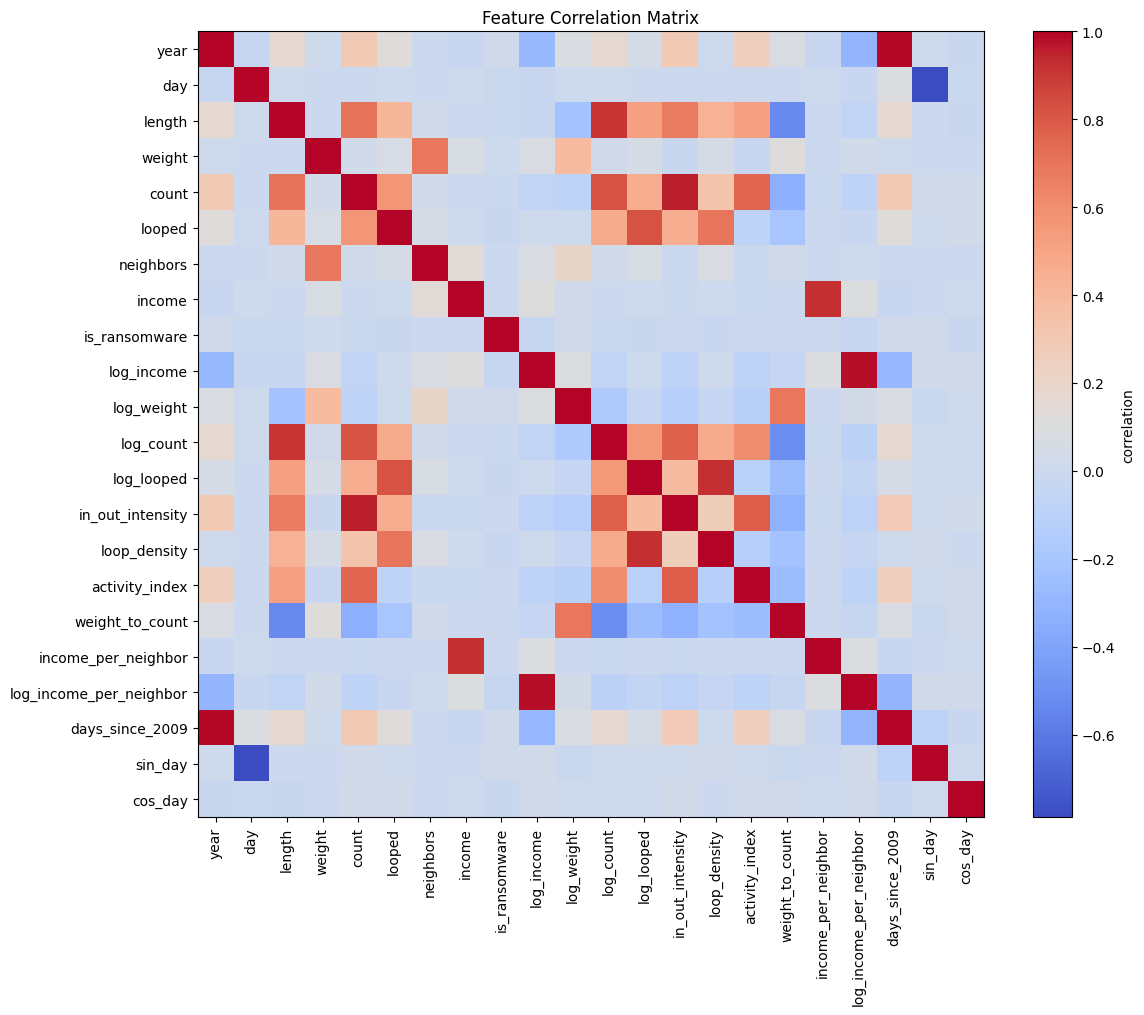

In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()

high_corr = (
    corr.mask(np.tril(np.ones(corr.shape)).astype(bool))  # upper triangle only
    .stack()
    .reset_index()
)
high_corr.columns = ["feature_1", "feature_2", "corr_value"]
high_corr = high_corr[high_corr["corr_value"].abs() > 0.85].sort_values(
    "corr_value", ascending=False
)
print(high_corr.head(20))


plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="correlation")
plt.title("Feature Correlation Matrix")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

In [14]:
to_drop = [
    "year",
    "log_income_per_neighbor",
    "in_out_intensity",
    "loop_density",
    "income",
    "length"
]
df = df.drop(columns=to_drop)

In [15]:
df.head()

,day,weight,count,looped,neighbors,is_ransomware,log_income,log_weight,log_count,log_looped,activity_index,weight_to_count,income_per_neighbor,days_since_2009,sin_day,cos_day
0,11,0.01,1,0,2,1,18.42,0.01,0.69,0.00,3.00,0.00,"33,350,000.00",2931,0.19,0.98
1,132,0.00,1,0,1,1,18.42,0.00,0.69,0.00,2.00,0.00,"50,000,000.00",2687,0.76,-0.65
2,246,1.00,1,0,2,1,19.11,0.69,0.69,0.00,3.00,0.50,"66,666,666.67",2801,-0.89,-0.46
3,322,0.00,1,0,2,1,18.08,0.00,0.69,0.00,3.00,0.00,"23,733,333.33",2877,-0.67,0.74
4,238,0.07,456,0,1,1,19.11,0.07,6.12,0.00,457.00,0.00,"100,000,000.00",2793,-0.82,-0.58


## Model training

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, roc_auc_score

In [17]:
ransom_df = df[df["is_ransomware"] == 1]
white_df = df[df["is_ransomware"] == 0].sample(
    n=len(ransom_df), random_state=42
)
balanced_df = pd.concat([ransom_df, white_df]).sample(frac=1, random_state=42)

In [18]:
X = balanced_df.drop(columns=["is_ransomware"])
y = balanced_df["is_ransomware"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [19]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)

In [20]:
X_train.head()

,day,weight,count,looped,neighbors,log_income,log_weight,log_count,log_looped,activity_index,weight_to_count,income_per_neighbor,days_since_2009,sin_day,cos_day
1041827,281,0.01,1,0,1,19.54,0.01,0.69,0.00,2.00,0.00,"152,690,076.00",1741,-0.99,0.12
1167721,42,0.06,1,0,2,18.73,0.06,0.69,0.00,3.00,0.03,"45,222,702.67",1867,0.66,0.75
11204,75,0.50,1,0,2,17.73,0.41,0.69,0.00,3.00,0.25,"16,666,666.67",2630,0.96,0.28
974042,213,0.50,1,0,1,17.69,0.41,0.69,0.00,2.00,0.25,"24,135,000.00",1673,-0.50,-0.87
2126112,270,1.00,1,0,1,17.84,0.69,0.69,0.00,2.00,0.50,"27,839,233.00",2825,-1.00,-0.06


In [21]:
cv_results = cross_validate(
    rf, X_train, y_train,
    cv=5,
    scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
    n_jobs=-1
)
print(pd.DataFrame(cv_results).mean())

fit_time         12.78
score_time        0.41
test_accuracy     0.87
test_precision    0.87
test_recall       0.88
test_f1           0.88
test_roc_auc      0.95
dtype: float64


In [22]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      8283
           1       0.88      0.89      0.88      8283

    accuracy                           0.88     16566
   macro avg       0.88      0.88      0.88     16566
weighted avg       0.88      0.88      0.88     16566

ROC-AUC: 0.9513159009573929


In [23]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))

days_since_2009       0.35
income_per_neighbor   0.12
log_income            0.12
day                   0.06
sin_day               0.06
cos_day               0.06
weight                0.04
log_weight            0.04
weight_to_count       0.04
activity_index        0.04
dtype: float64
